# Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

##### In this, I will be looking at the survival rate of the passengers on Titanic based on various parameters and conclude the results.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [7]:
passengers_raw = pd.read_csv('/home/lakshay/Desktop/downunder/titanic_data.csv')
matplotlib.style.use('ggplot')

In [8]:
passengers_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
passengers_raw.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Data Wrangling Phase

In this phase, I will be removing Cabin column from the original table to focus on the important parameters of the analysis and further I will be removing every row whose sex is not defined to make my analysis simpler.

Also, observing the above numbers Embarked column has 2 missing values so we will be filling those values with a random variable X for equal entries in all the columns.

In [10]:
passengers_raw = passengers_raw.drop('Cabin', 1)

In [11]:
passengers_raw.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
dtype: int64

In [12]:
passengers_raw['Embarked'].fillna(value='X', inplace=True)

In [13]:
passengers_raw.dropna(inplace=True)

In [14]:
passengers_raw.count()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Embarked       714
dtype: int64

### Exploration Phase 

In this phase we will explore our data in more detail and extract out the analysis and prove them with the help of visualizations.

In [16]:
class_survived = passengers_raw.groupby('Pclass')
class_survived = class_survived['Survived'].mean()*100
class_survived

Pclass
1    65.591398
2    47.976879
3    23.943662
Name: Survived, dtype: float64

Populating the interactive namespace from numpy and matplotlib


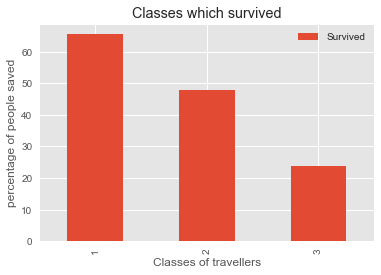

In [17]:
%pylab inline

ax = class_survived.plot(kind='bar',
                   title='Classes which survived',
                   grid=True,
                   legend=True)
ax.set(xlabel="Classes of travellers", ylabel="percentage of people saved")

#### The above analysis tells us, "better the class of the passenger, better the survival rate"

In [18]:
sex_survived = passengers_raw.groupby('Sex')['Survived'].mean()*100
sex_survived

Sex
female    75.478927
male      20.529801
Name: Survived, dtype: float64

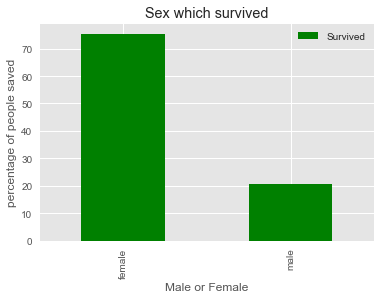

In [19]:
ax = sex_survived.plot(kind='bar',
                   title='Sex which survived',
                   grid=True,
                   legend=True,
                   color="green")
ax.set(xlabel="Male or Female", ylabel="percentage of people saved")

#### The above analysis signifies that female has approximately 55% more survival rate than male. So, survival rate of females is definitely better than men

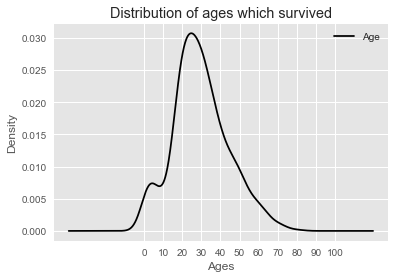

In [20]:
age_survival = passengers_raw['Age'].plot(kind='density',
                   title='Distribution of ages which survived',
                   grid=True,
                   legend=True,
                    xticks=[0,10,20,30,40,50,60,70,80,90,100],
                    color="#000000")
age_survival.set(xlabel="Ages", ylabel="Density")

#### The above density curve is not perfectly normal but partially normal and it signifies that the passengers with the age group between 20-30 has the maximum survival rate. In the next section, we will divide the ages into groups and then do our further analysis.

> The age is divided into following groups.

> If Age is less than 12, the group is children
> If Age is between 12 and 17, the group is Teenage
> If Age is between 18 and 60, the group is Adult
> If Age is above 60, the group is Old.

In [21]:
def category_of_ages(age):
    if age>=60:
        return 'Old'
    elif age>=18:
        return 'Adult'
    elif age>=12:
        return 'Teenager'
    else:
        return 'Children'

passengers_raw['Age_category'] = passengers_raw['Age'].apply(category_of_ages)
passengers_raw.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Children
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Teenager
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,Children


In [22]:
age_category_survived = passengers_raw.groupby('Age_category')['Survived'].mean()*100
age_category_survived

Age_category
Adult       38.608696
Children    57.352941
Old         26.923077
Teenager    48.888889
Name: Survived, dtype: float64

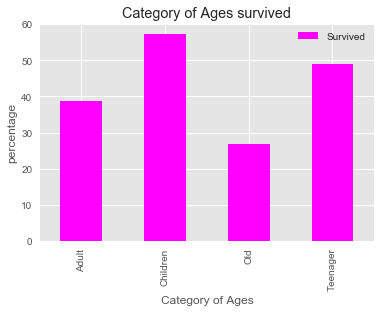

In [23]:
ax = age_category_survived.plot(kind='bar',
                               title='Category of Ages survived',
                               grid=True,
                               legend=True,
                               color="magenta")
ax.set(xlabel="Category of Ages", ylabel="percentage")

#### I have divided ages into 4 main groups: Child, Teenage, Adult and Old. According to our analysis, the survival rate of child is maximum, and following children is the survival rate of Teenagers, then Adults and the least survival rate is of Old Age people.

In [24]:
### Optional: Calculating fare range of all classes
# print passengers_raw['Fare'].max()
fare = passengers_raw.groupby('Pclass')['Fare'].mean()
fare

Pclass
1    87.961582
2    21.471556
3    13.229435
Name: Fare, dtype: float64

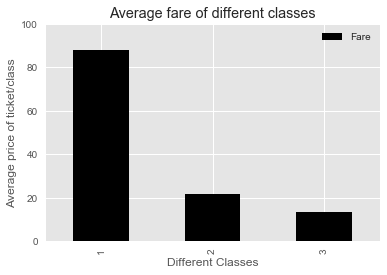

In [25]:
ax = fare.plot(kind="bar",
              title="Average fare of different classes",
              grid=True,
              legend=True,
              yticks=[0,20,40,60,80,100],
              color="black")
ax.set(xlabel="Different Classes", ylabel="Average price of ticket/class")

#### The above analysis shows that the travel class is positively corelated with fares, greater the fare, better the class.

In [26]:
class_and_sex = passengers_raw.groupby(['Sex', 'Pclass'])['Survived'].mean()*100
class_and_sex

Sex     Pclass
female  1         96.470588
        2         91.891892
        3         46.078431
male    1         39.603960
        2         15.151515
        3         15.019763
Name: Survived, dtype: float64

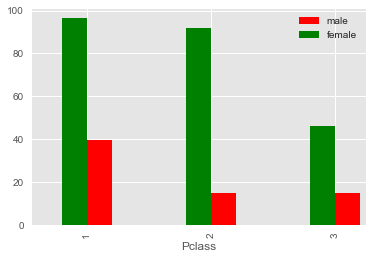

In [27]:
class_and_sex.loc['male'].plot(kind="bar",
                              grid=True,
                              position=0,
                              legend=True,
                              label="male",
                              width=0.2,
                              color="red")

class_and_sex.loc['female'].plot(kind="bar",
                              grid=True,
                              position=1,
                              legend=True,
                              label="female",
                              width=0.2,
                              color="green")

#### The above analysis shows us that female of class 1 and 2 have much survival rate than class 3. As compared to female, male survival rate are less than half of survival rate of female. Also, Males in class 1 has survival rate more than class 2 and class 3 males combined. 

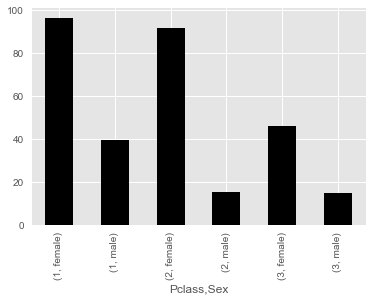

In [28]:
class_and_sex1 = passengers_raw.groupby(['Pclass', 'Sex'])['Survived'].mean()*100
fig, ax = plt.subplots()
class_and_sex1.plot.bar(ax=ax, color="black")

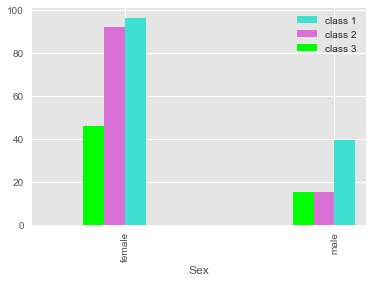

In [29]:
class_and_sex1
class_and_sex1.loc[1].plot(kind="bar",
                              grid=True,
                              position=0,
                              legend=True,
                              label="class 1",
                              width=0.1,
                              color="turquoise")

class_and_sex1.loc[2].plot(kind="bar",
                              grid=True,
                              position=1,
                              legend=True,
                              label="class 2",
                              width=0.1,
                              color="orchid")

class_and_sex1.loc[3].plot(kind="bar",
                              grid=True,
                              position=2,
                              legend=True,
                              label="class 3",
                              width=0.1,
                              color="lime")

#### The above 2 graphs is the result of same data just represented differently. This graph is similar to the previous graph analyzed of class and sex, just the grouping is different for a different representation of the data.

In [30]:
class_and_category = passengers_raw.groupby(['Pclass', 'Age_category'])['Survived'].mean()*100
class_and_category

Pclass  Age_category
1       Adult            67.515924
        Children         75.000000
        Old              29.411765
        Teenager        100.000000
2       Adult            41.780822
        Children        100.000000
        Old              25.000000
        Teenager         66.666667
3       Adult            20.220588
        Children         40.425532
        Old              20.000000
        Teenager         32.258065
Name: Survived, dtype: float64

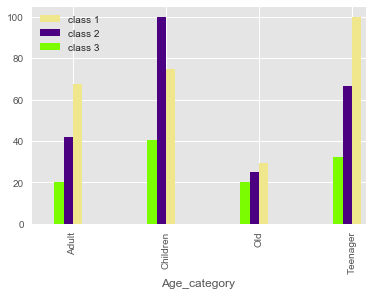

In [31]:
class_and_category.loc[1].plot(kind="bar",
                              grid=True,
                              position=0,
                              legend=True,
                              label="class 1",
                              width=0.1,
                              color="khaki")

class_and_category.loc[2].plot(kind="bar",
                              grid=True,
                              position=1,
                              legend=True,
                              label="class 2",
                              width=0.1,
                              color="indigo")

class_and_category.loc[3].plot(kind="bar",
                              grid=True,
                              position=2,
                              legend=True,
                              label="class 3",
                              width=0.1,
                              color="lawngreen")

#### The above analysis is based on the survival rate of categories of ages we created above with the class of travel. In the above graph for class 1, Teenager have the highest survival rate and Old have the lowest. For class 2, Children have the highest survival rate and Old have again the lowest survival rate. Class 3 have very less survival rate in all the categories as compared to class 1 and 2, but in class 3 children have the maximum survival rate and Old have the minimum survival rate. Overall Children have the highest survival rate and Old age people have the lowest survival in Titanic wreckage.

In [32]:
sex_category = passengers_raw.groupby(['Sex', 'Age_category'])['Survived'].mean()*100
sex_category

Sex     Age_category
female  Adult            76.732673
        Children         59.375000
        Old             100.000000
        Teenager         82.608696
male    Adult            17.962466
        Children         55.555556
        Old              13.636364
        Teenager         13.636364
Name: Survived, dtype: float64

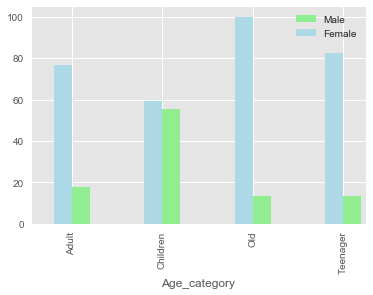

In [33]:
sex_category.loc['male'].plot(kind="bar",
                              grid=True,
                              position=0,
                              legend=True,
                              label="Male",
                              width=0.2,
                             color="lightgreen")

sex_category.loc['female'].plot(kind="bar",
                              grid=True,
                              position=1,
                              legend=True,
                              label="Female",
                              width=0.2,
                               color="lightblue")

#### The above analysis is about the survival rate of different age categories beased on sex i.e. male and female. Among female, Old category has the highest survival rate and children have the least survival rate. Among males, children have the highest survival rate and Teenage and old have the same and least survival rate. 

In [41]:
family_member_sib = passengers_raw.groupby('SibSp')['Survived'].mean()*100
family_member_sib

SibSp
0    37.154989
1    53.005464
2    44.000000
3    33.333333
4    16.666667
5     0.000000
Name: Survived, dtype: float64

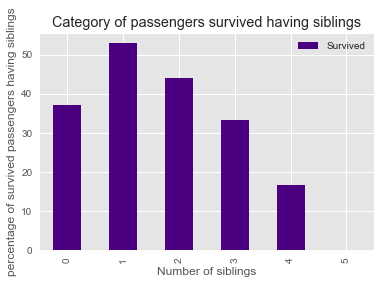

In [48]:
ax = family_member_sib.plot(kind="bar",
                           title='Category of passengers survived having siblings',
                           grid=True,
                           legend=True,
                           color="Indigo")
ax.set(xlabel="Number of siblings", ylabel="percentage of survived passengers having siblings")

#### This is an attempt to check whether the number of siblings/spouse affect the survival rate but the distribution is a positive distribution with the passenger having 1 sibling having the maximum survival rate. The least being the passenger having 5 siblings.

In [43]:
family_member_parent = passengers_raw.groupby('Parch')['Survived'].mean()*100
family_member_parent

Parch
0    35.700576
1    55.454545
2    57.352941
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64

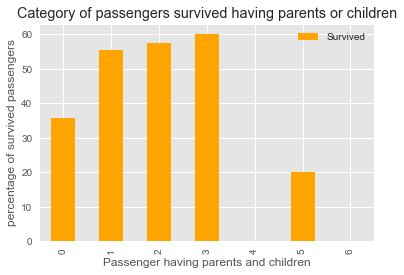

In [49]:
ax = family_member_parent.plot(kind="bar",
                           title='Category of passengers survived having parents or children',
                           grid=True,
                           legend=True,
                           color="orange")
ax.set(xlabel="Passenger having parents and children", ylabel="percentage of survived passengers")

#### This is an attempt to check whether the number of parents and children affect the survival rate but the distribution is a negative distribution with the passenger having 1, 2 & 3 having almost same survival rate. Having 4 and 6 parents and children results in the least survival rate. This analysis is somewhat not useful in the main analysis.

# Conclusion


### What factors made people more likely to survive?

##### All investigated independent variables ("Pclass", "Sex", "Age") have a correlation with the dependent variable of survival.

#### Pclass (Travel class):
##### A better travel class is positively correlated with survival.

#### Sex:
##### Women were more likely to survive than men. This was the case in every age category and in every travel class. Over 90% of the women in travel class 1 and 2 survived according to this data set.

#### Age:
##### The data suggests that children, have had a better chance of survival. Children had a slightly better chance of survial compared to adults. In every age category - with the exception of children - survival seems to also have been influenced by travel class in the way described above. Also, old age people are likely to survive the least.



### Limitations:

###### The orignial dataset doesn't contain data for all passengers and trough the data wrangling phase even more information was excluded. This means that the results of this analysis are only an estimate of the real circumstance.